In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part I: Descriptive Analysis

In [27]:
test_df = pd.read_excel('test_data.xlsx')
test_df.head()

,Id,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,0,EUAfrica,"b'RT @eu_eeas: ""Let me tell you that a big par...",NaN,belgium,Male,NaN
1,1,COVID19,"b'RT @stateofgreendk: ""Although the #COVID19 p...",NaN,denmark,Male,NaN
2,2,NaN,b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0...,hjorvarhaflida,iceland,Female,NaN
3,3,NaN,"b'I ett l\xc3\xa4ge med pandemi, klimat, trans...",NaN,sweden,Female,NaN
4,4,UNGA ChildrenNotSoldiers,b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\x...,NaN,belgium,Male,NaN


In [28]:
train_df = pd.read_excel('training_data.xlsx')
train_df.head()

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407223 entries, 0 to 407222
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hashtags                 127040 non-null  object
 1   full_text                407223 non-null  object
 2   in_reply_to_screen_name  76747 non-null   object
 3   country_user             407223 non-null  object
 4   gender_user              407223 non-null  object
 5   pol_spec_user            407223 non-null  object
dtypes: object(6)
memory usage: 18.6+ MB


### Section A

In [30]:
# a)
# Function to calculate tweet and hashtag lengths
def calculate_lengths(train_df):
    # Calculate tweet length in characters and words
    train_df['tweet_char_length'] = train_df['full_text'].astype(str).apply(len)  # # characters in the tweet
    train_df['tweet_word_length'] = train_df['full_text'].astype(str).apply(lambda x: len(x.split()))  # # words in the tweet

    # Calculate hashtag length in characters and words
    train_df['hashtag_char_length'] = train_df['hashtags'].astype(str).apply(len)  # # characters in hashtags
    train_df['hashtag_word_length'] = train_df['hashtags'].astype(str).apply(lambda x: len(x.split()))  # # words in hashtags

    # Create the summary table
    summary_table = pd.DataFrame({
        'Minimum': [train_df['tweet_char_length'].min(), train_df['tweet_word_length'].min(),
                    train_df['hashtag_char_length'].min(), train_df['hashtag_word_length'].min()],
        'Average': [train_df['tweet_char_length'].mean(), train_df['tweet_word_length'].mean(),
                    train_df['hashtag_char_length'].mean(), train_df['hashtag_word_length'].mean()],
        'Median': [train_df['tweet_char_length'].median(), train_df['tweet_word_length'].median(),
                   train_df['hashtag_char_length'].median(), train_df['hashtag_word_length'].median()],
        'Maximum': [train_df['tweet_char_length'].max(), train_df['tweet_word_length'].max(),
                    train_df['hashtag_char_length'].max(), train_df['hashtag_word_length'].max()]
    }, index=['Tweet Char Length', 'Tweet Word Length', 'Hashtag Char Length', 'Hashtag Word Length'])

    return summary_table

# Generate and display the summary table
summary_table = calculate_lengths(train_df)
summary_table


,Minimum,Average,Median,Maximum
Tweet Char Length,4,167.304121,156.0,2994
Tweet Word Length,1,20.141102,19.0,89
Hashtag Char Length,1,6.459694,3.0,145
Hashtag Word Length,1,1.180230,1.0,16


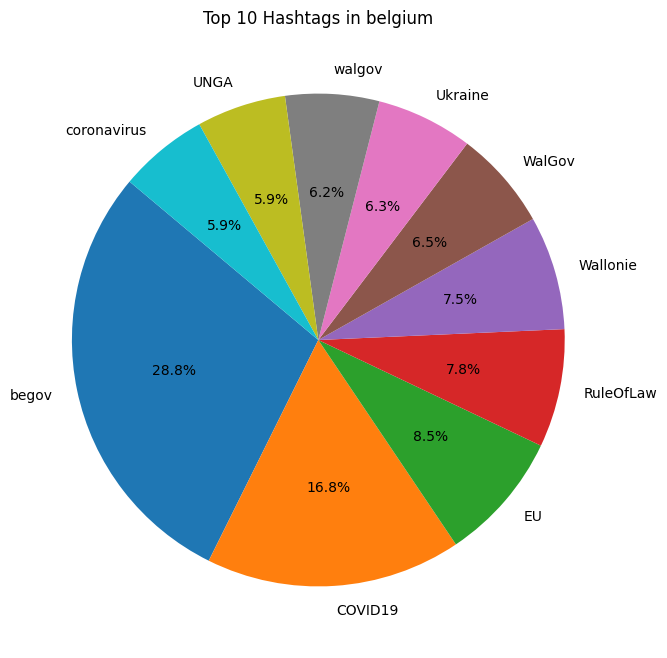

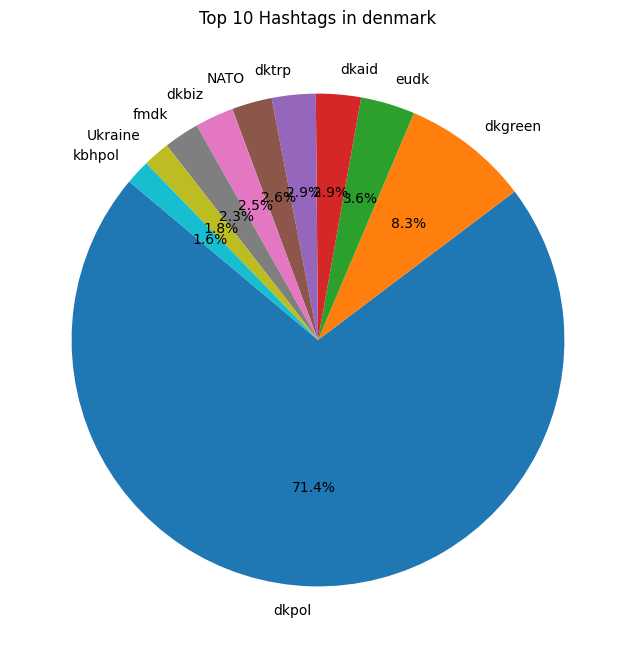

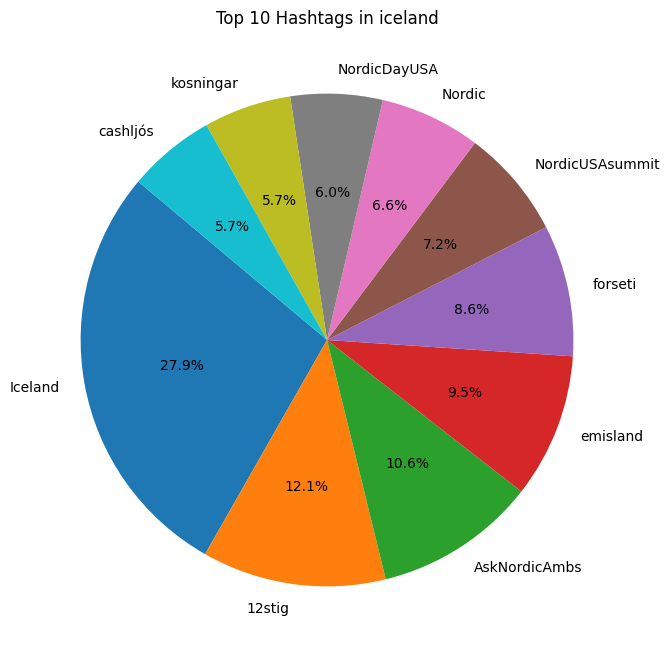

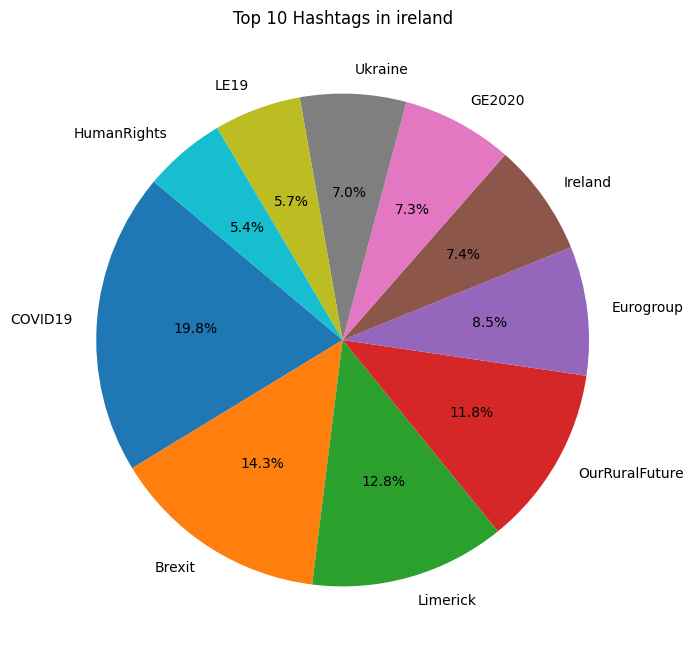

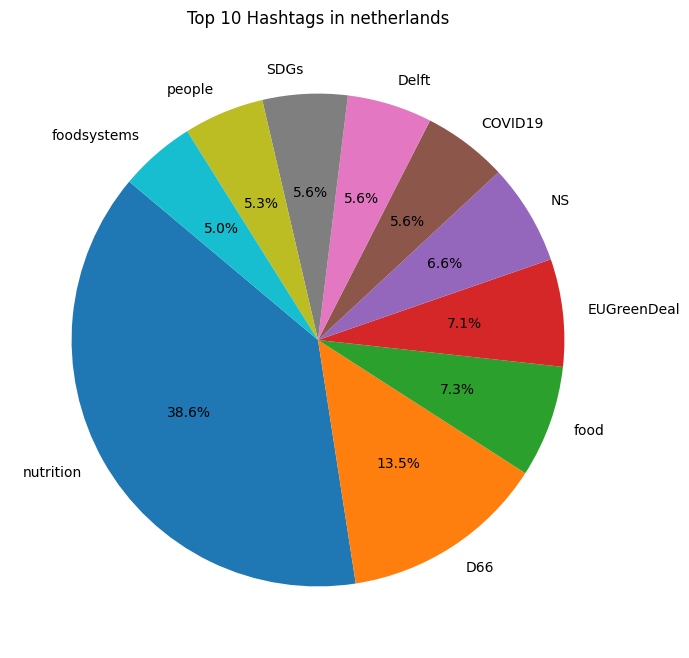

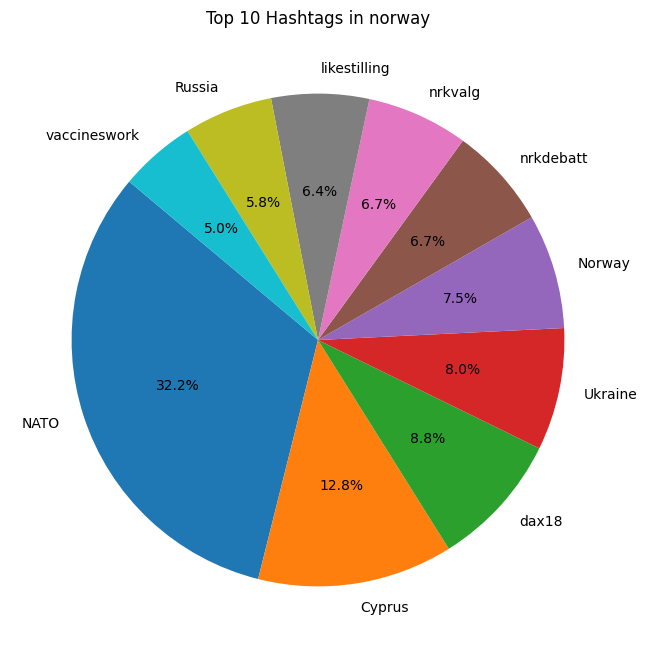

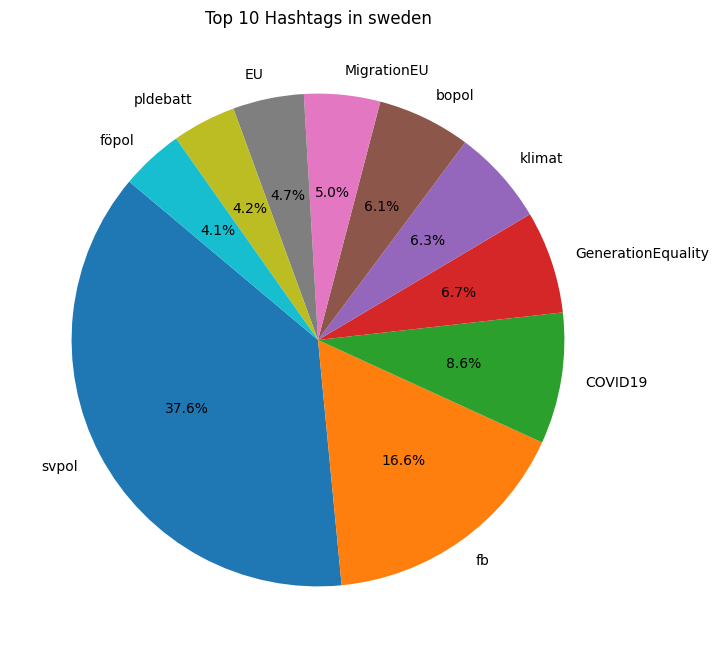

In [31]:
# b)
def find_top_hashtags(df):
    # Split hashtags by country
    country_groups = df.groupby('country_user')['hashtags']
    
    # Dictionary to hold top hashtags by country
    top_hashtags_by_country = {}
    
    # Iterate over each country
    for country, hashtags_series in country_groups:
        # Split each hashtag list into individual hashtags, flatten the list, and count occurrences
        all_hashtags = hashtags_series.dropna().str.split().sum()  # Assuming hashtags are space-separated
        hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)  # Get top 10 hashtags
        
        # Save top 10 hashtags for the current country
        top_hashtags_by_country[country] = hashtag_counts
        
        # Plot pie chart for the current country
        plt.figure(figsize=(8, 8))
        hashtag_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Top 10 Hashtags in {country}')
        plt.ylabel('')  # Hide y-axis label for clarity
        plt.show()

    return top_hashtags_by_country

# Get the top hashtags and generate pie charts
top_hashtags_by_country = find_top_hashtags(train_df)

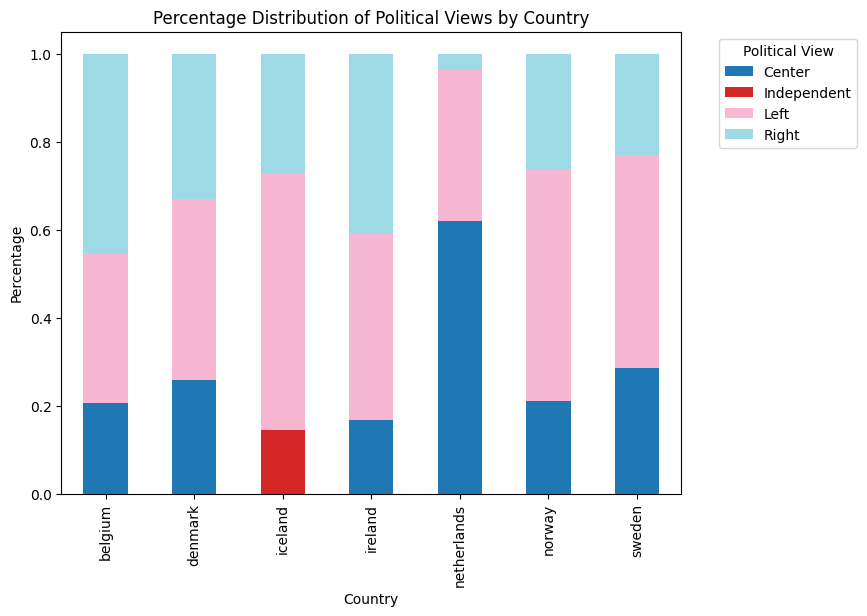

In [32]:
# c)
def plot_political_view_distribution(df):
    # Count the occurrences of each political view per country
    country_view_counts = df.groupby(['country_user', 'pol_spec_user']).size().unstack(fill_value=0)

    # Normalize counts to percentages (0 to 1 scale for each country)
    country_view_percentages = country_view_counts.div(country_view_counts.sum(axis=1), axis=0)

    # Plot stacked bar chart
    country_view_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
    plt.title('Percentage Distribution of Political Views by Country')
    plt.xlabel('Country')
    plt.ylabel('Percentage')
    plt.legend(title='Political View', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call the function to plot the distribution
plot_political_view_distribution(train_df)

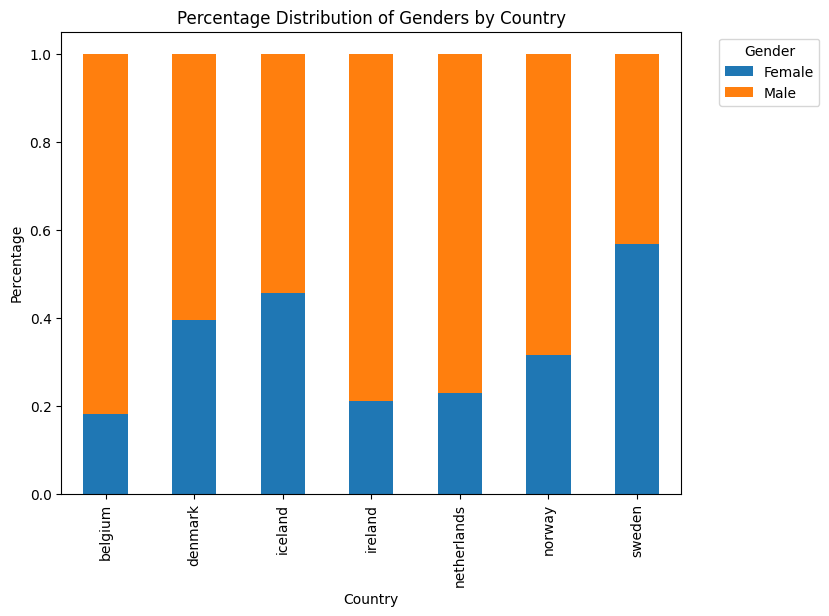

In [33]:
# d)
def plot_gender_distribution(df):
    # Count the occurrences of each gender per country
    country_gender_counts = df.groupby(['country_user', 'gender_user']).size().unstack(fill_value=0)

    # Normalize counts to percentages (0 to 1 scale for each country)
    country_gender_percentages = country_gender_counts.div(country_gender_counts.sum(axis=1), axis=0)

    # Plot stacked bar chart
    country_gender_percentages.plot(kind='bar', stacked=True, figsize=(8, 6)) # , colormap='Pastel3'
    plt.title('Percentage Distribution of Genders by Country')
    plt.xlabel('Country')
    plt.ylabel('Percentage')
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call the function to plot the distribution
plot_gender_distribution(train_df)

### Section B

In [34]:
# a)

import string
import nltk
from nltk.corpus import stopwords

# Write the function tweet_cleaner()

def tweet_cleaner(tweet):
    # i. Remove stop words from the tweet
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)

    # ii. Remove all words that are shorter than 3 characters
    tweet = ' '.join(word for word in tweet.split() if len(word) >= 3)

    # iii. Remove all links (all the words for which the first four letters are http)
    tweet = ' '.join(word for word in tweet.split() if not word.startswith('http'))

    # iv. Remove all emojis (all the words that contain \\)
    tweet = ' '.join(word for word in tweet.split() if '\\' not in word)

    # v. Remove punctuation
    tweet = tweet.translate(str.maketrans("","", string.punctuation))

    return tweet

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

# Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [36]:
# Create a text_clean column that has data applied lemmatize tweet
train_df['text_clean'] = train_df['full_text'].apply(lemmatize_tweet)

# Function to calculate text_clean lengths and update the summary table
def add_text_clean_lengths(train_df, existing_summary_table):
    # Calculate text_clean length in characters and words
    train_df['text_clean_char_length'] = train_df['text_clean'].astype(str).apply(len)  # # characters in text_clean
    train_df['text_clean_word_length'] = train_df['text_clean'].astype(str).apply(lambda x: len(x.split()))  # # words in text_clean

    # Create a new DataFrame for text_clean metrics
    text_clean_summary = pd.DataFrame({
        'Minimum': [train_df['text_clean_char_length'].min(), train_df['text_clean_word_length'].min()],
        'Average': [train_df['text_clean_char_length'].mean(), train_df['text_clean_word_length'].mean()],
        'Median': [train_df['text_clean_char_length'].median(), train_df['text_clean_word_length'].median()],
        'Maximum': [train_df['text_clean_char_length'].max(), train_df['text_clean_word_length'].max()]
    }, index=['Text Clean Char Length', 'Text Clean Word Length'])

    # Append the new metrics to the existing summary table
    updated_summary_table = pd.concat([existing_summary_table, text_clean_summary])
    return updated_summary_table

# Update the summary table
summary_table = add_text_clean_lengths(train_df, summary_table)
summary_table

,Minimum,Average,Median,Maximum
Tweet Char Length,4,167.304121,156.0,2994
Tweet Word Length,1,20.141102,19.0,89
Hashtag Char Length,1,6.459694,3.0,145
Hashtag Word Length,1,1.180230,1.0,16
Text Clean Char Length,0,92.311031,90.0,725
Text Clean Word Length,0,12.755716,12.0,77


In [37]:
# Save the data to a new csv file
train_df.to_csv('clean_training_data.csv', index=False)

In [38]:
# b)

from time import time

from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 400000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [39]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(train_df['text_clean'])
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 7.788s.


In [40]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(train_df['text_clean'])
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 12.438s.



Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=400000 and n_features=1000...
done in 27.024s.


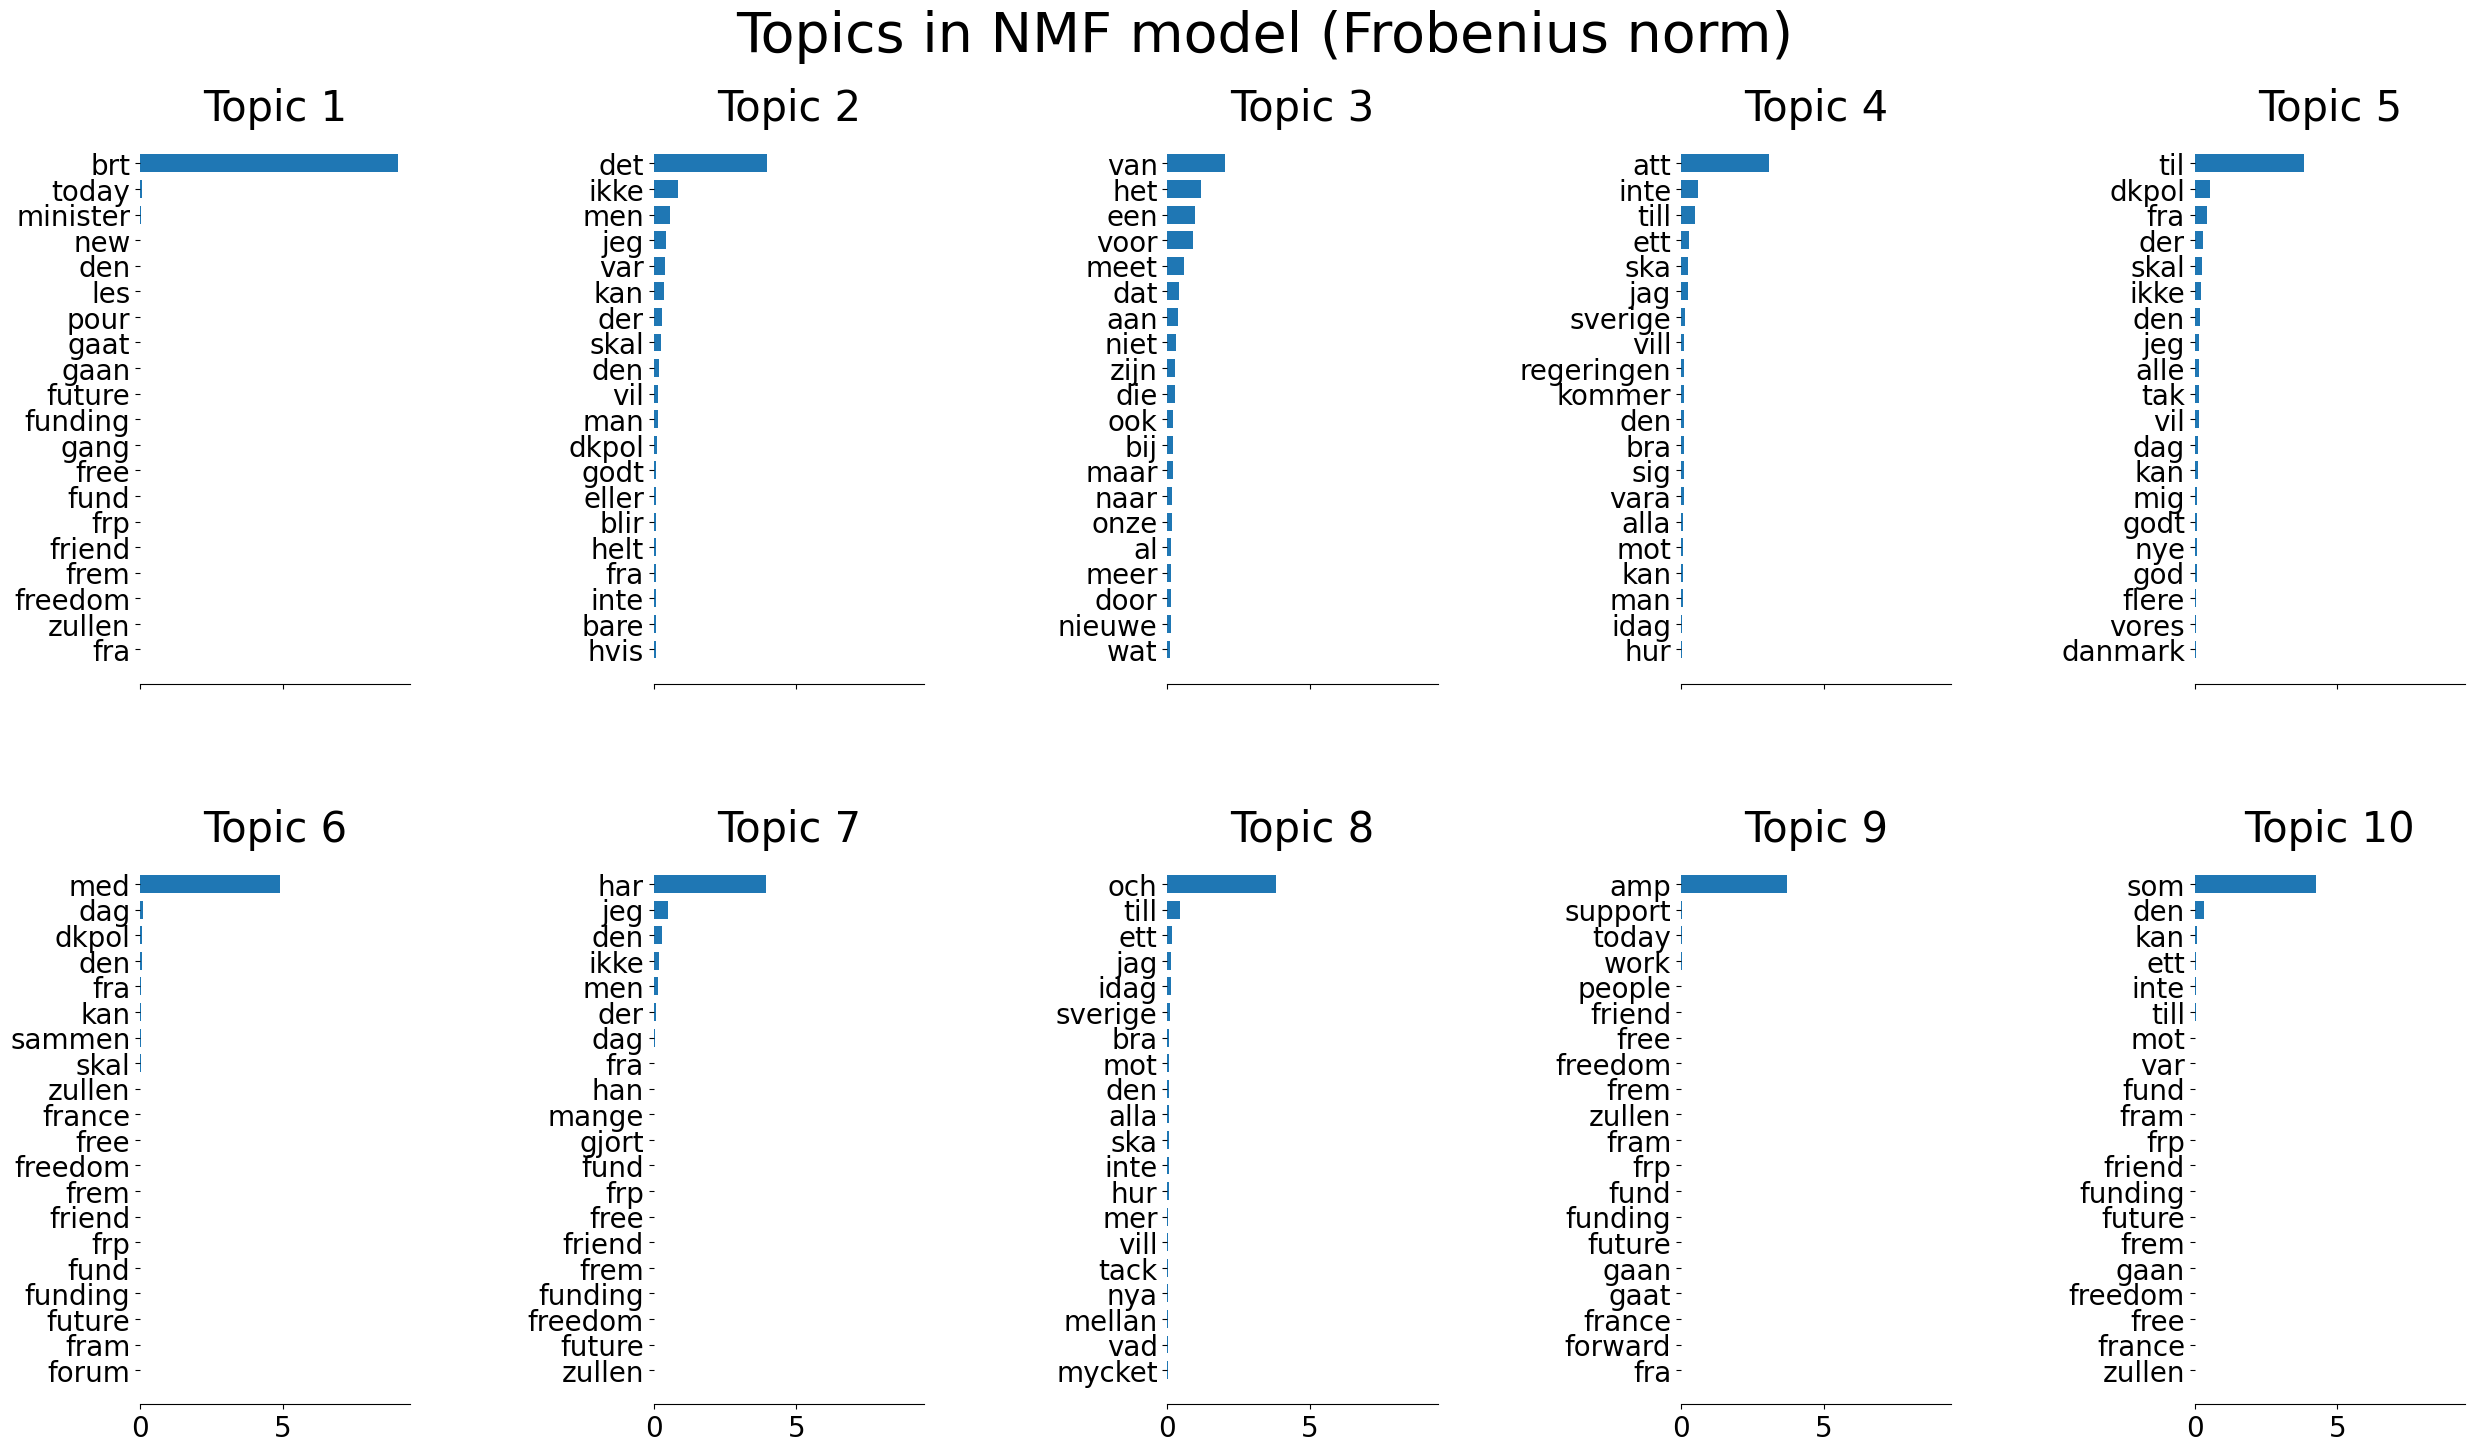

In [41]:
# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=400000 and n_features=1000...
done in 101.740s.


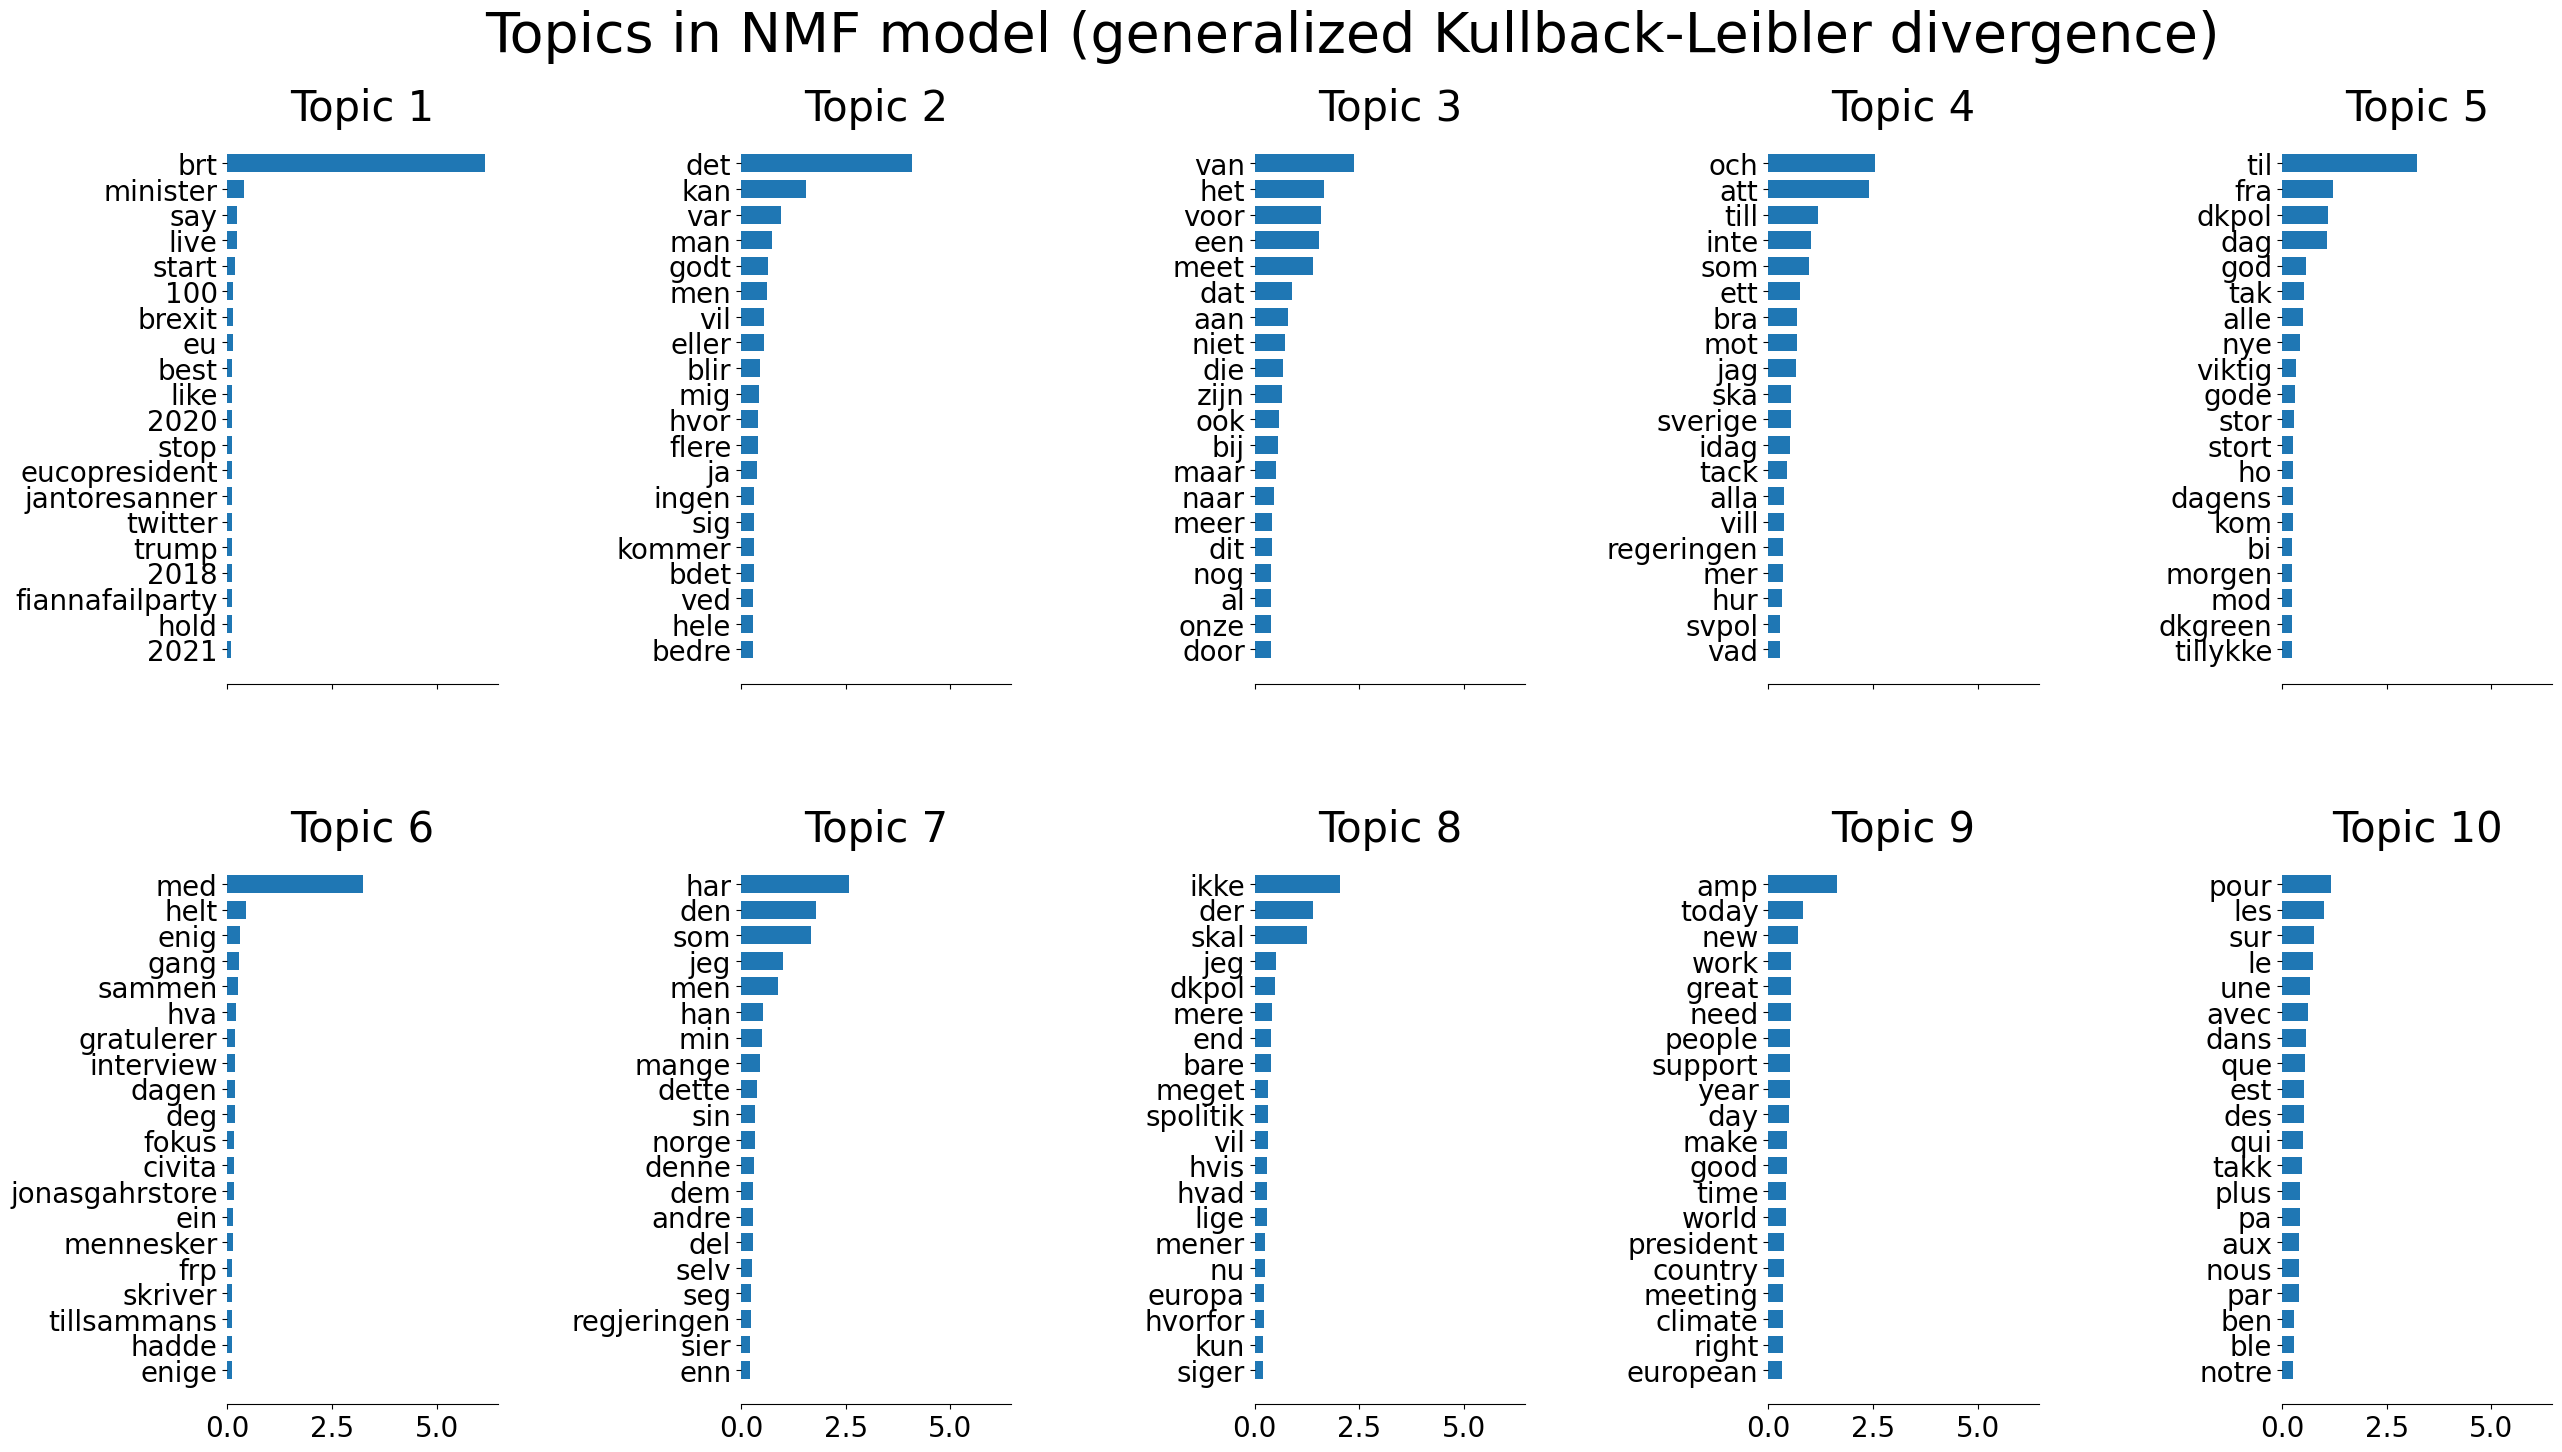

In [42]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=400000 and n_features=1000, batch_size=128...
done in 2.620s.


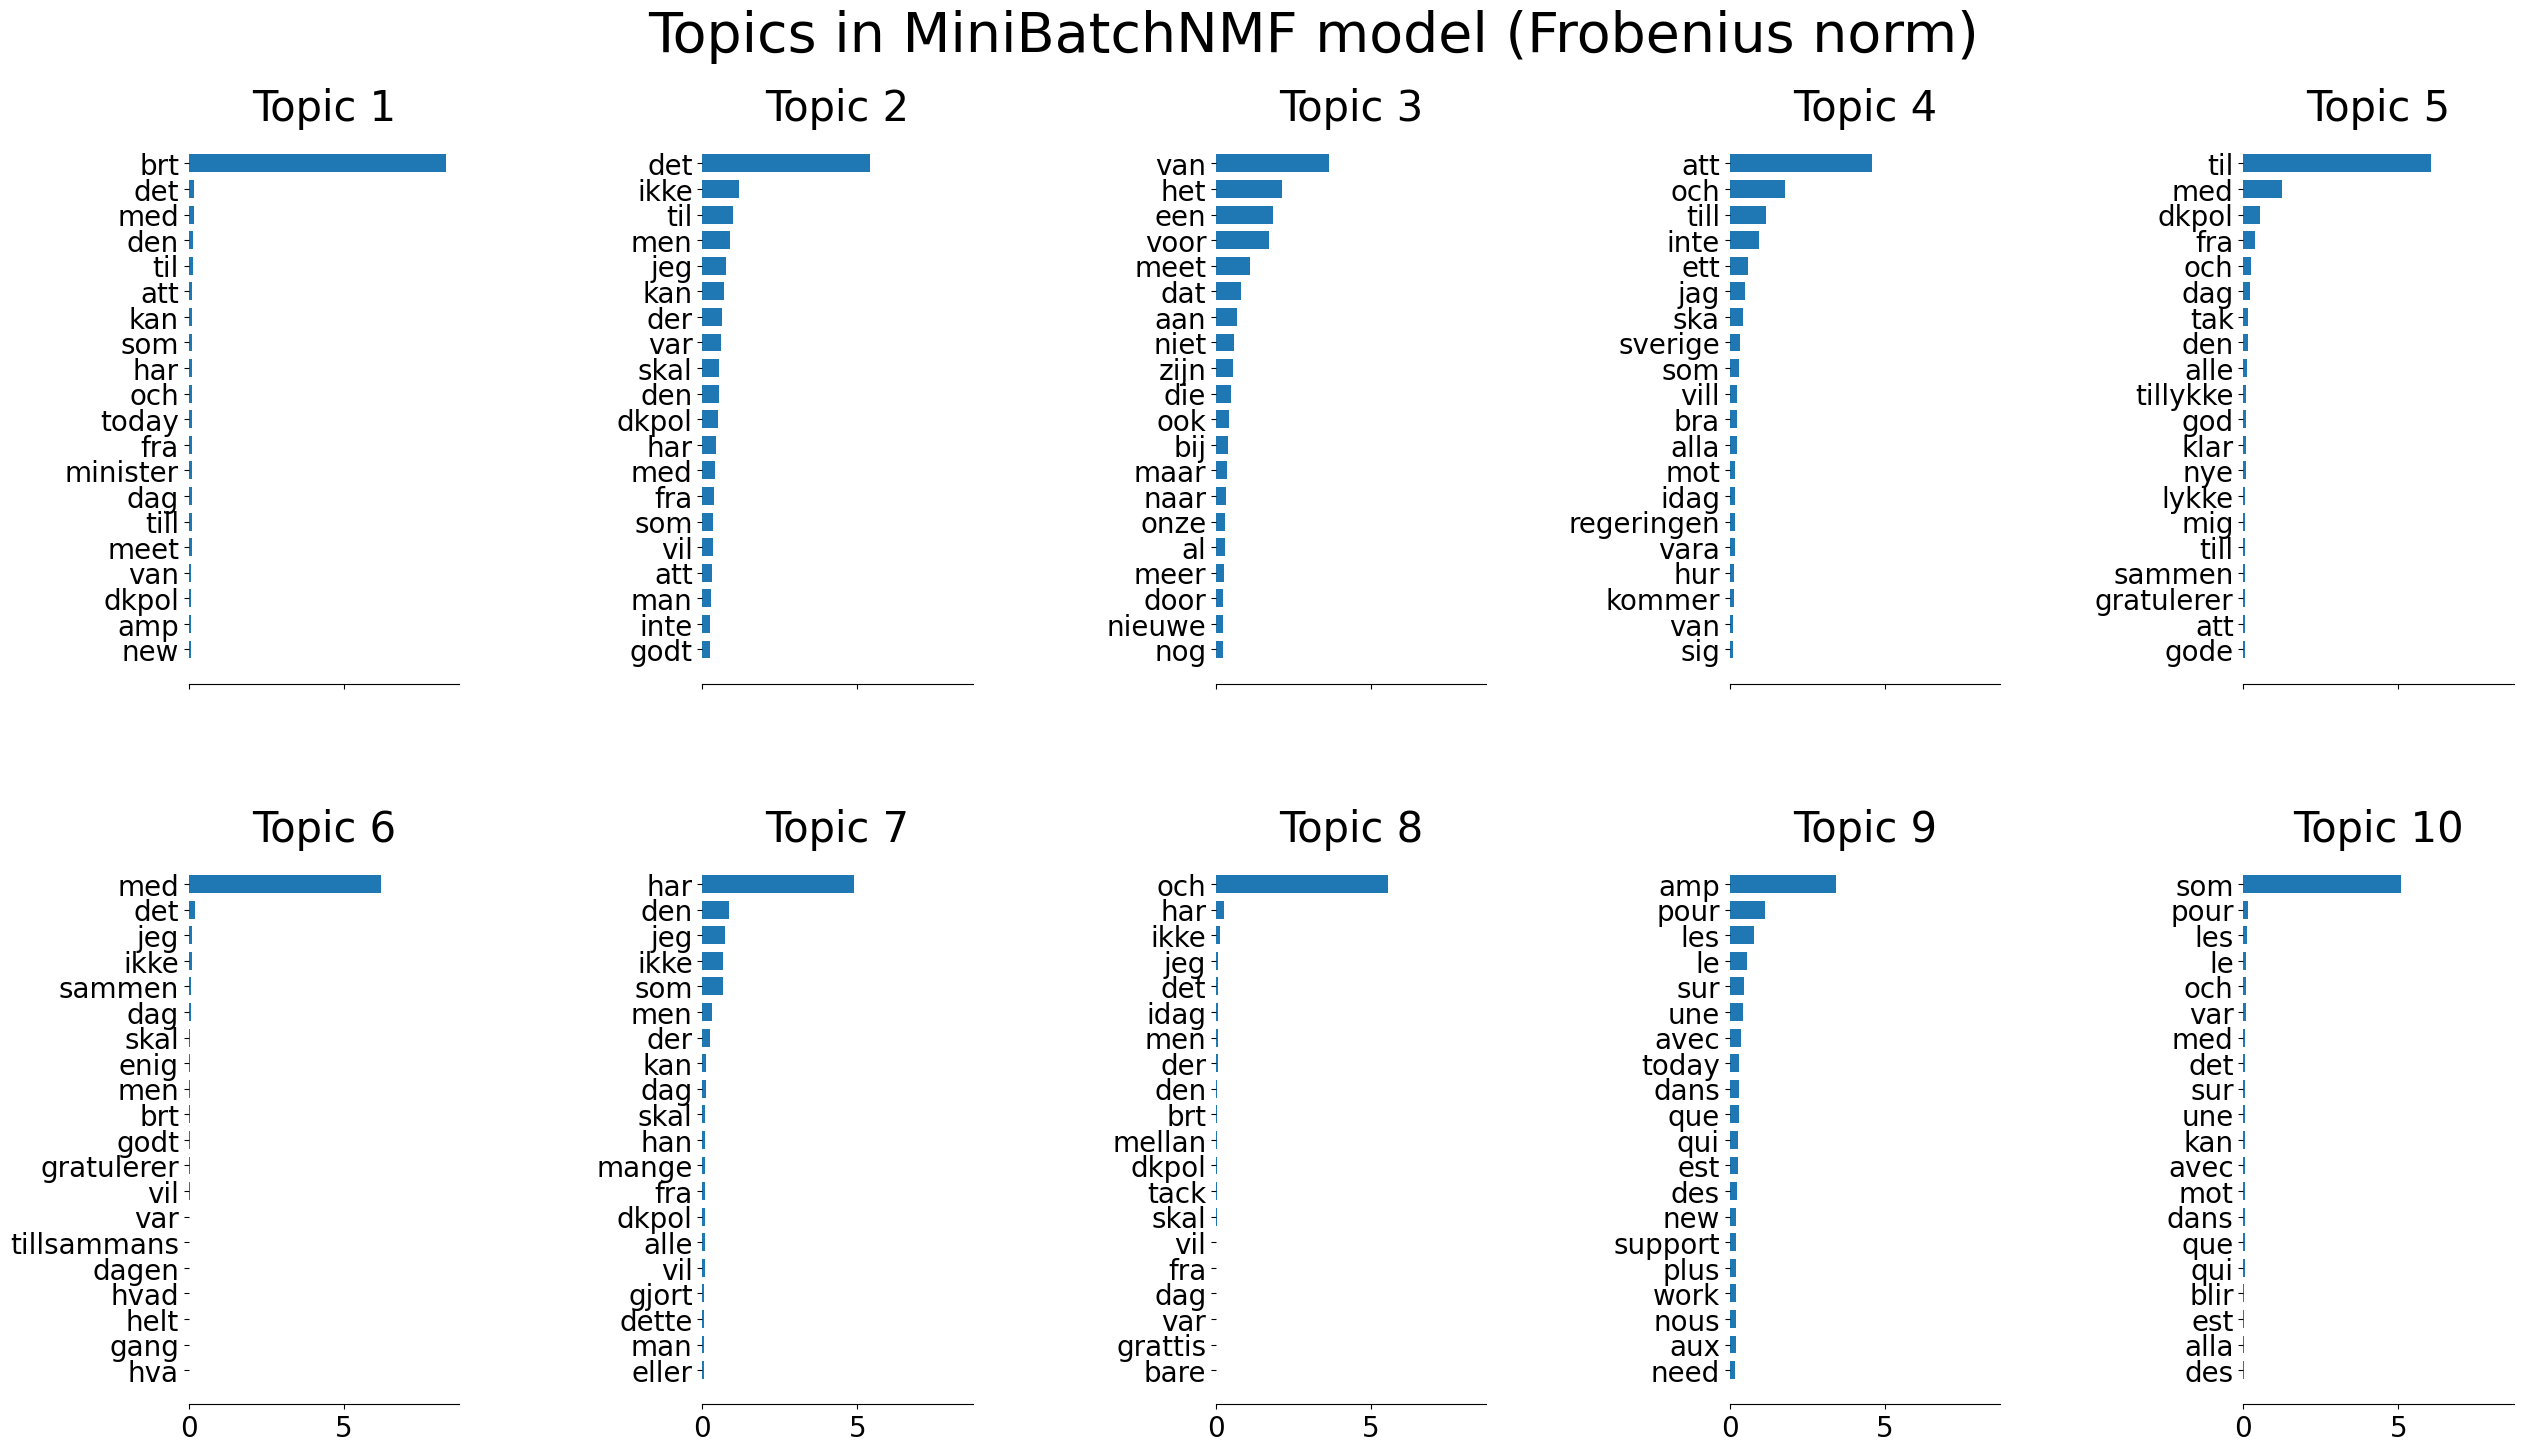

In [43]:
# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=400000 and n_features=1000, batch_size=128...
done in 10.119s.


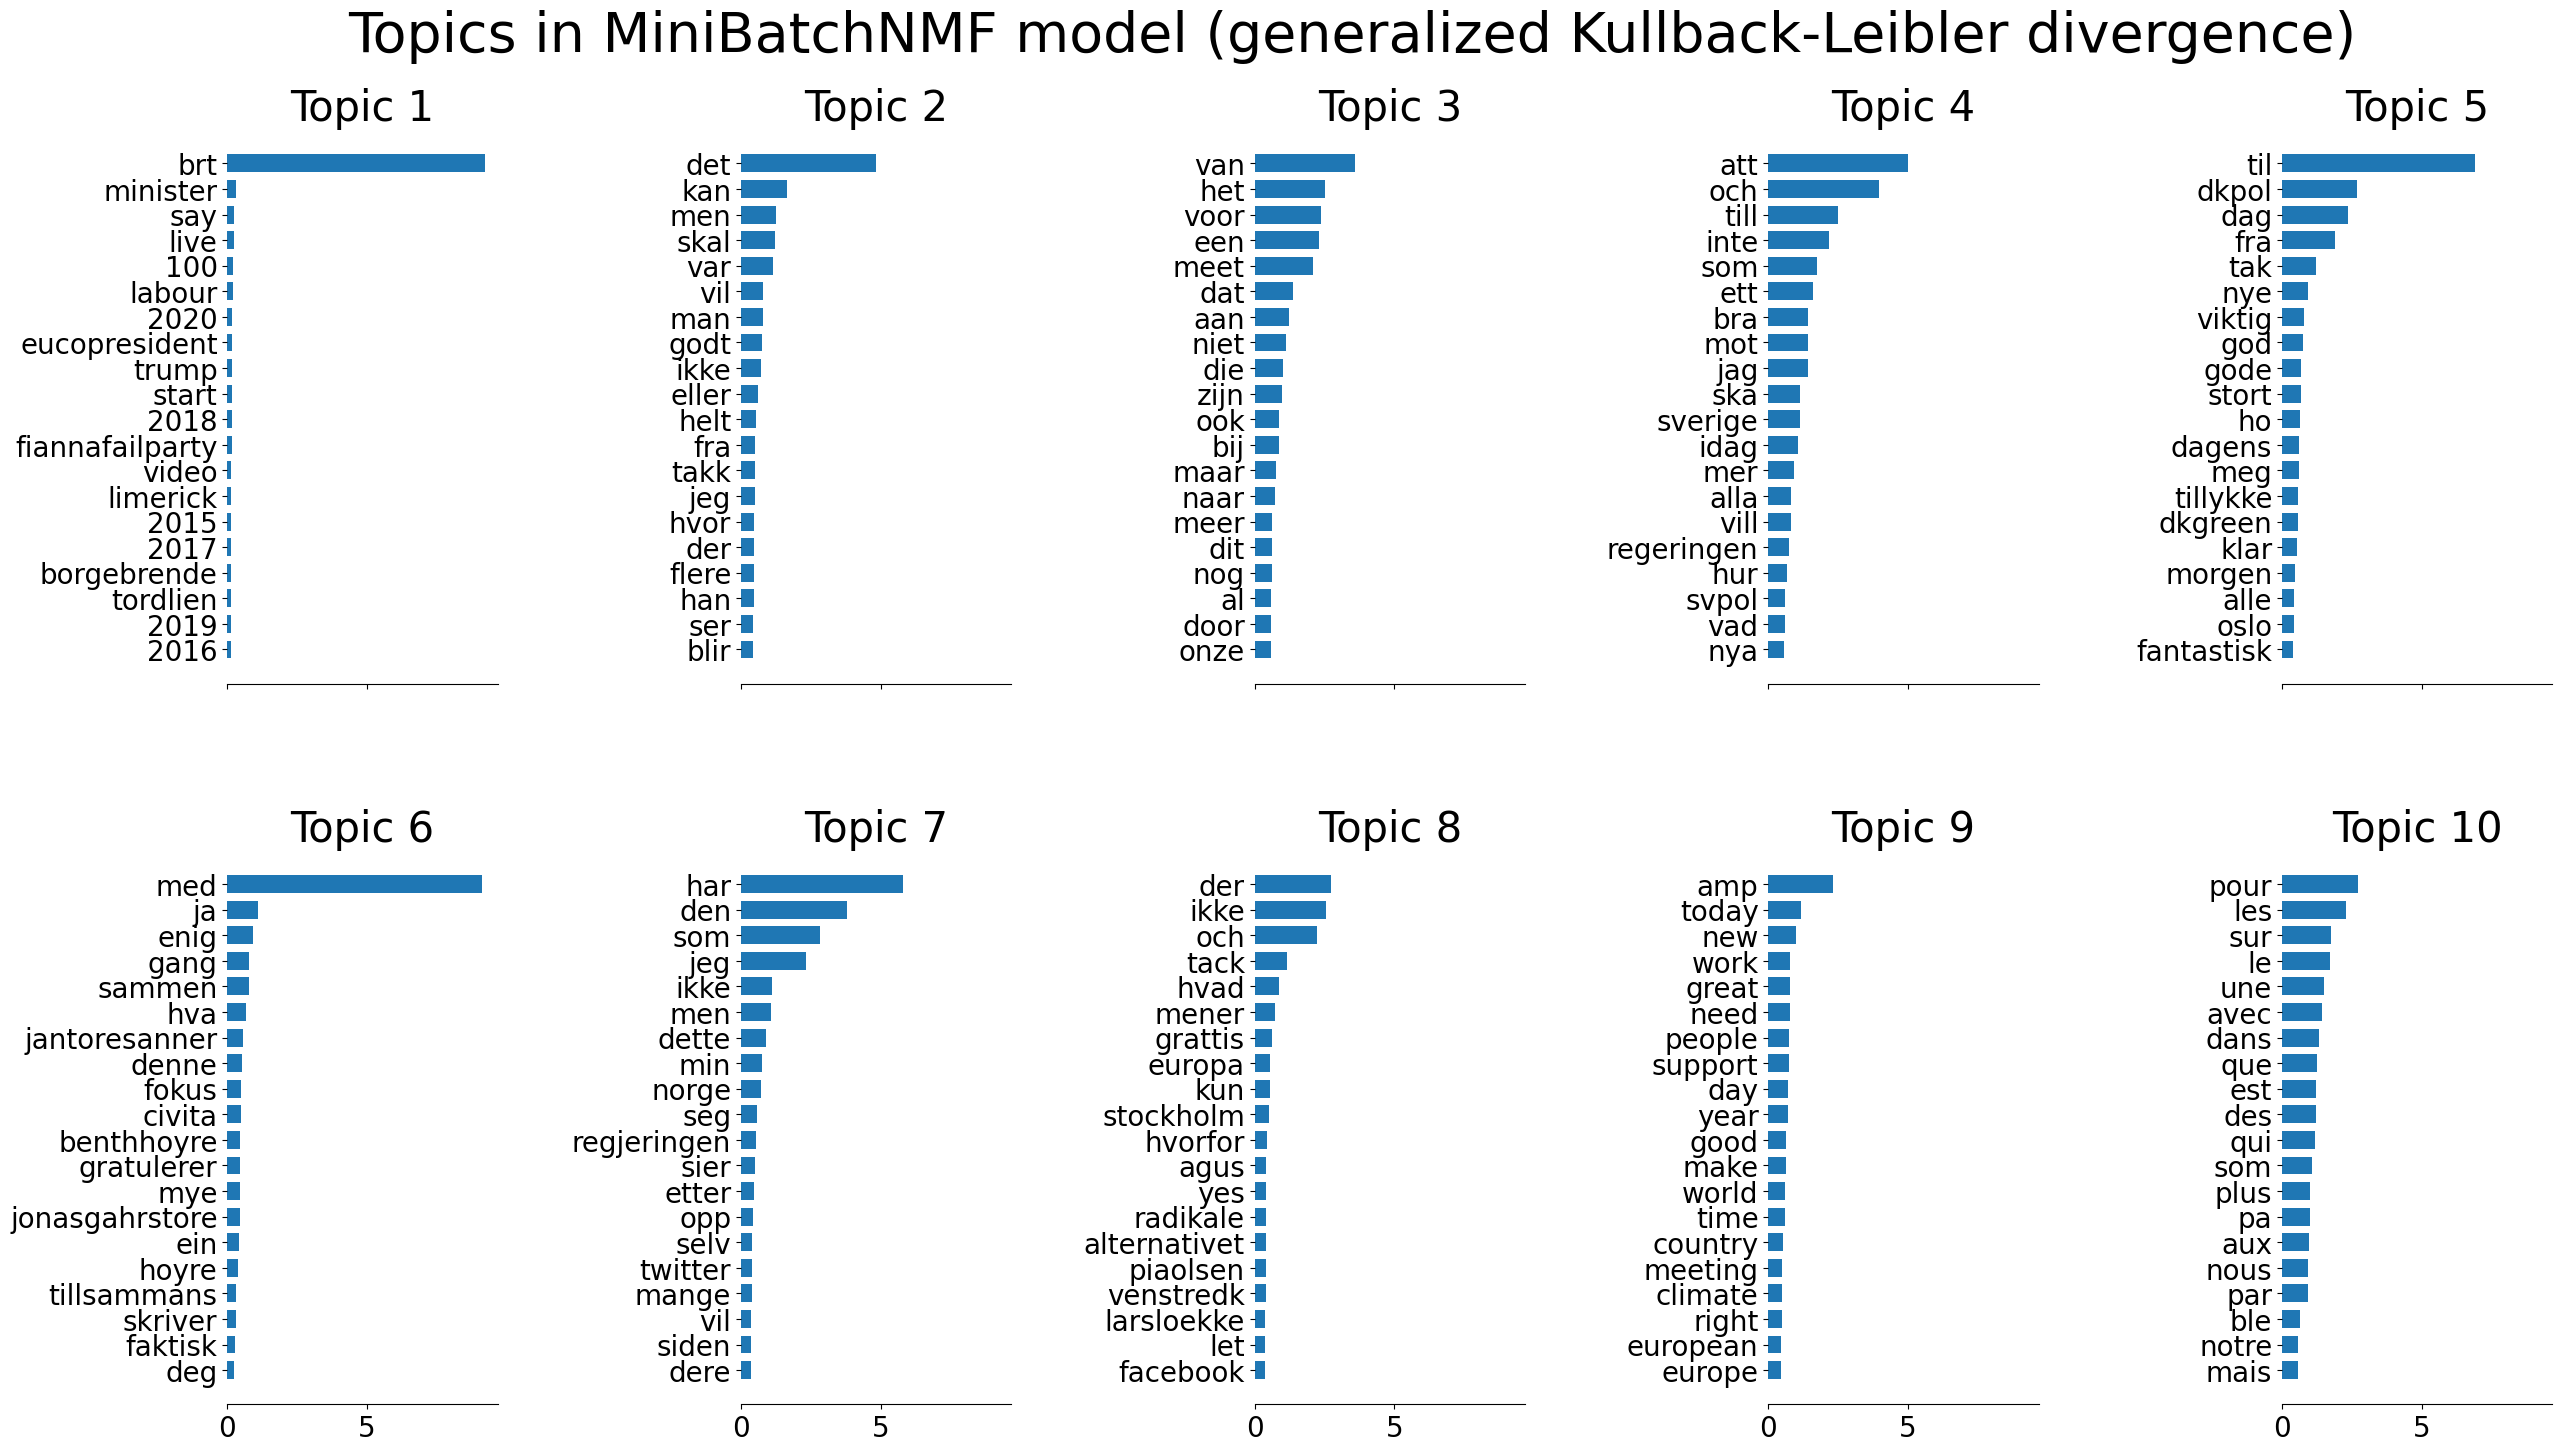

In [44]:
# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)



 Fitting LDA models with tf features, n_samples=400000 and n_features=1000...
done in 219.874s.


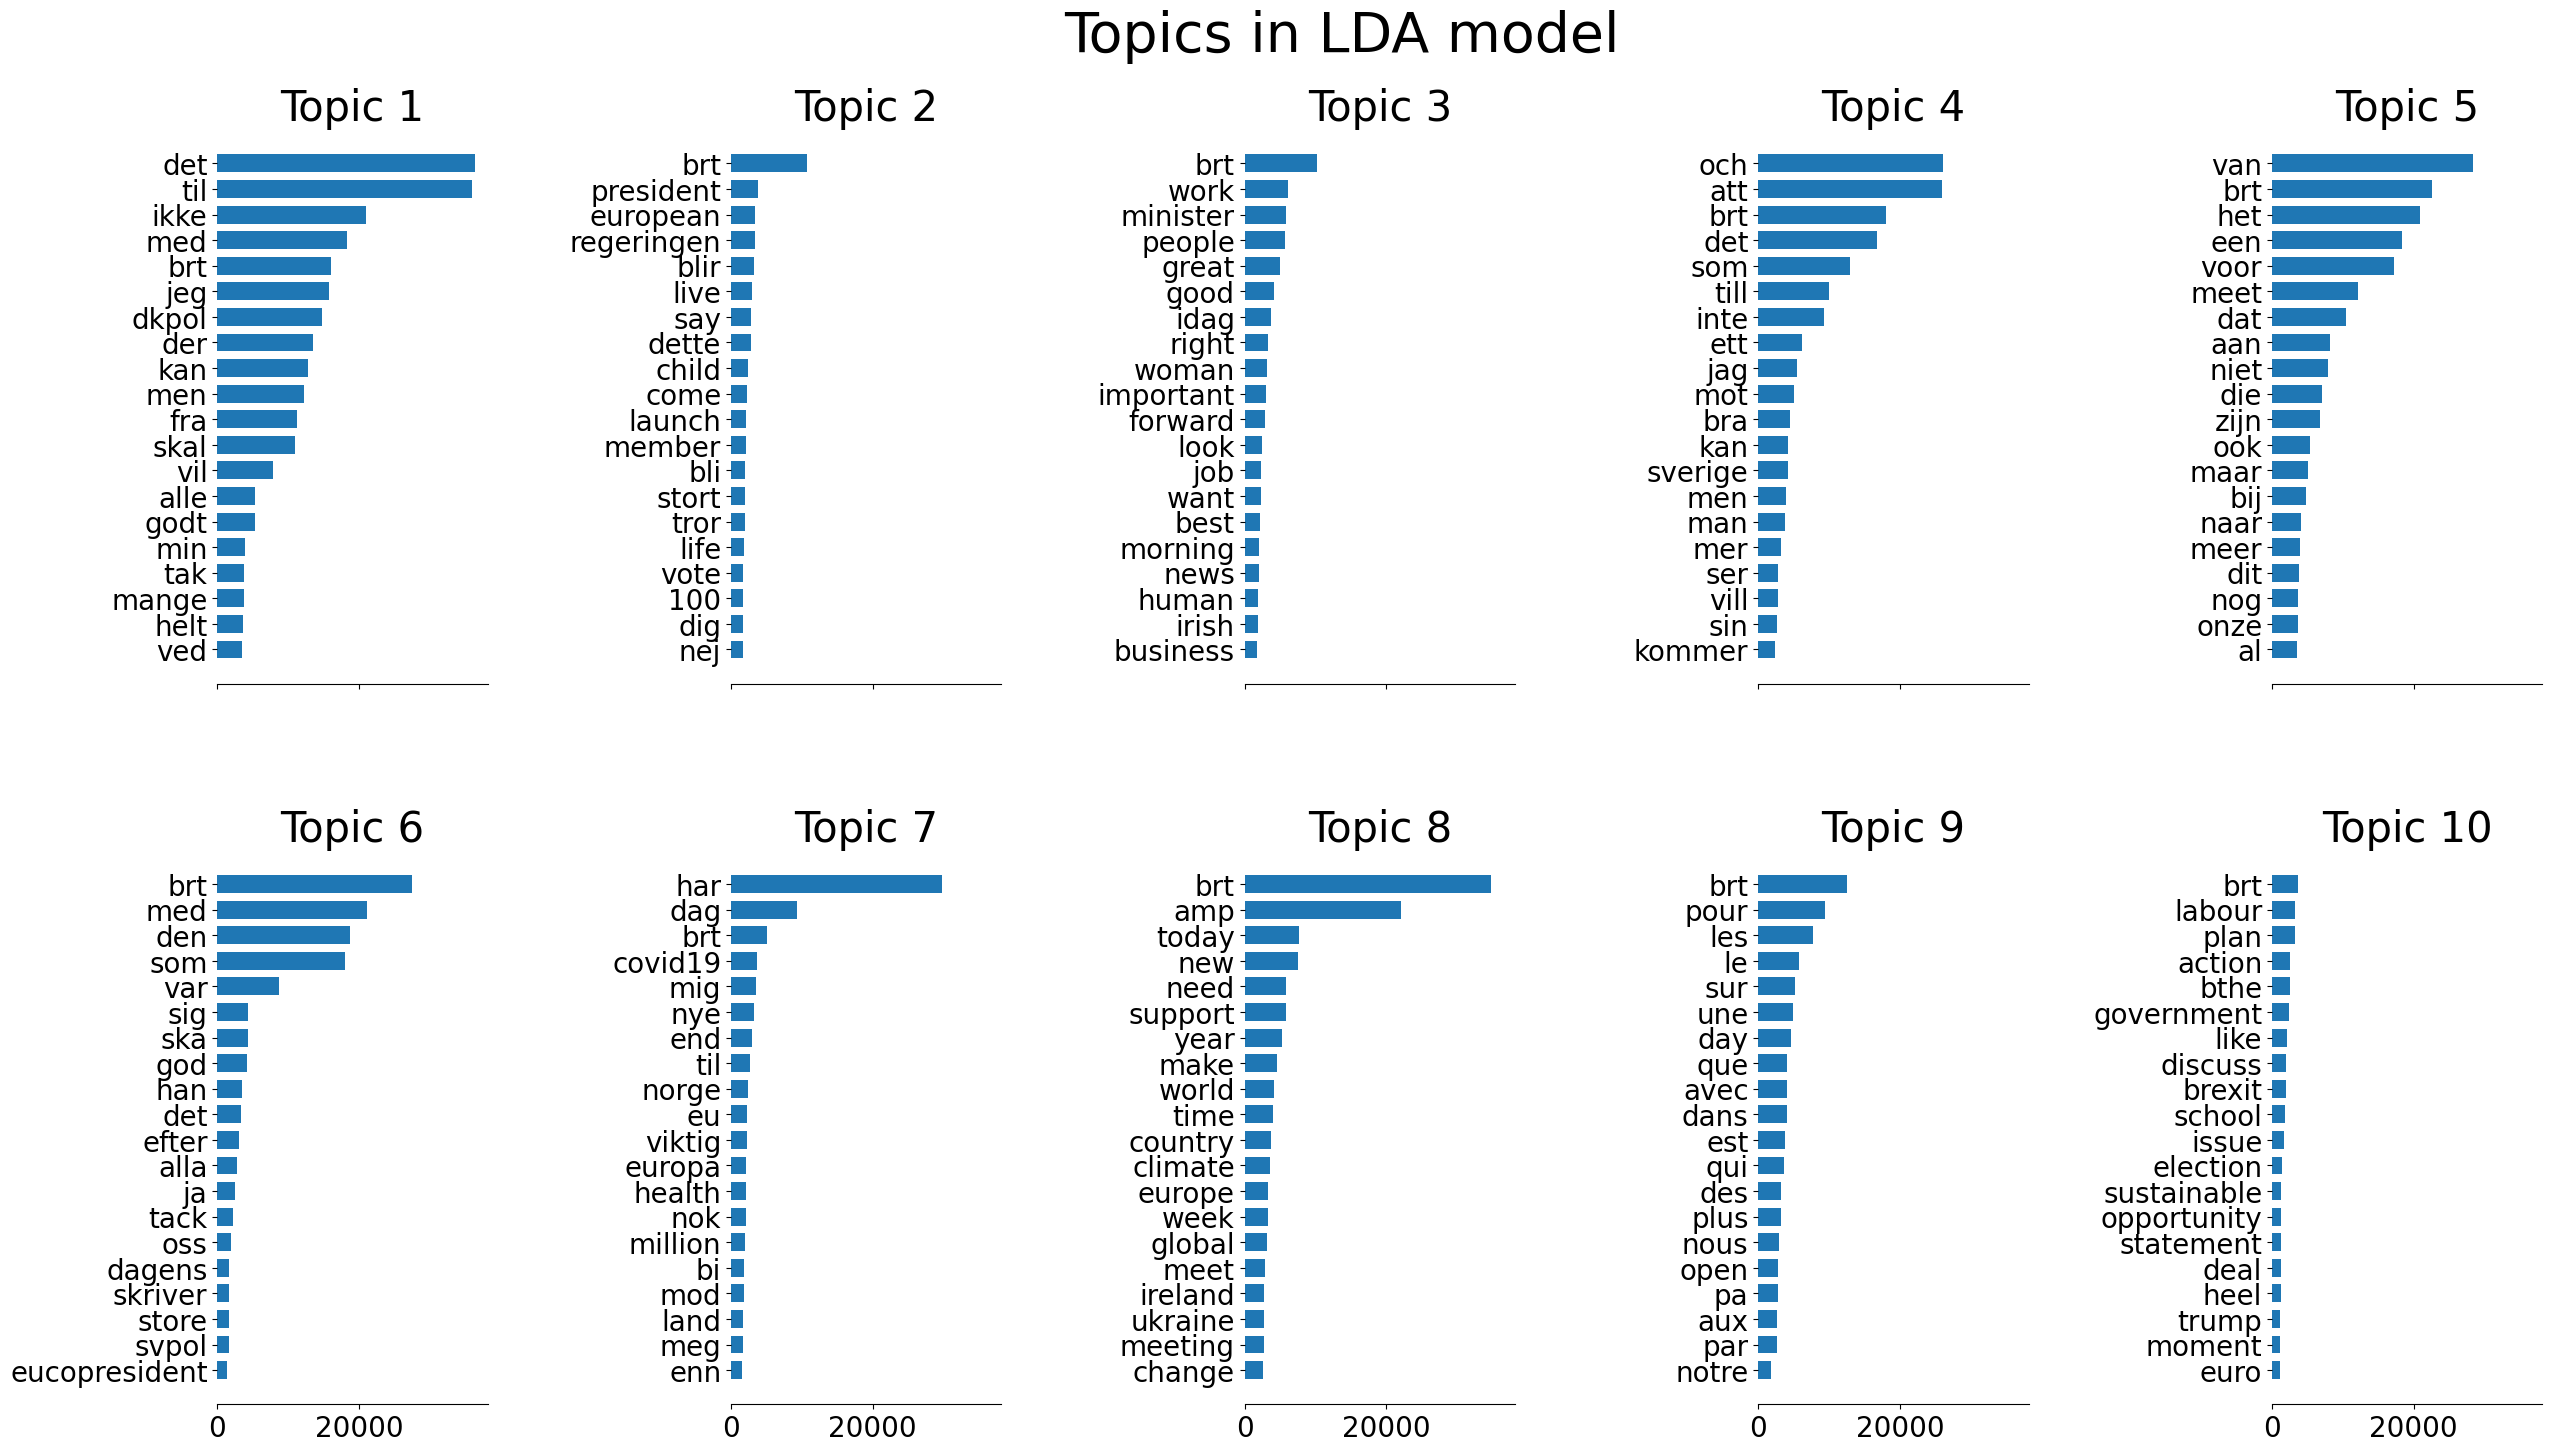

In [45]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

### Part II: Model creation and prediction

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
# Import the clean training dataset
clean_train_df = pd.read_csv('clean_training_data.csv')
test_df = pd.read_excel('test_data.xlsx')

In [48]:
clean_train_df.head()

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user,tweet_char_length,tweet_word_length,hashtag_char_length,hashtag_word_length,text_clean,text_clean_char_length,text_clean_word_length
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left,154,25,22,2,bRT swedennewyork What mean feminist governmen...,88,12
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left,107,13,3,1,bJens Stoltenberg virtuelle Rockheim dag sjekk...,50,7
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left,63,7,3,1,bPanenkaBart Veel beterschap Bart Loes,38,5
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left,179,15,3,1,bRT CarlEmilLind Tydelige aftryk CO2 reduktion...,62,8
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left,43,2,3,1,NaN,0,0


In [49]:
# Lemmatize the text on test_df
test_df['text_clean'] = test_df['full_text'].apply(lemmatize_tweet)

In [50]:
# Replace NaN values with empty strings in specific columns
clean_train_df['in_reply_to_screen_name'] = clean_train_df['in_reply_to_screen_name'].fillna('')
clean_train_df['hashtags'] = clean_train_df['hashtags'].fillna('')
test_df['hashtags'] = test_df['hashtags'].fillna('')
test_df['in_reply_to_screen_name'] = test_df['in_reply_to_screen_name'].fillna('')

# Join string
X_train = clean_train_df['country_user'] + " " + clean_train_df['gender_user'] + " " + clean_train_df['text_clean'] + " " + clean_train_df['hashtags'] + " " + clean_train_df['in_reply_to_screen_name']
# X_train = clean_train_df['country_user'] + " " + clean_train_df['gender_user'] + " " + clean_train_df['text_clean'] + " " + clean_train_df['hashtags']
y_train = clean_train_df['pol_spec_user']
X_train = X_train.astype(str)

X_test = test_df['country_user'] + " " + test_df['gender_user'] + " " + test_df['text_clean'] + " " + test_df['hashtags'] + " " + test_df['in_reply_to_screen_name']
X_test = X_test.astype(str)

prediction = {'ID' : test_df['Id'], 'pol_spec_user' : test_df['pol_spec_user']}

In [51]:
# Linear SVC 

linearsvc_df = pd.DataFrame(prediction)

svc_count_vector = CountVectorizer(ngram_range=(1,2))
svc_tfidf_vector = TfidfVectorizer(max_features=2000)

# Create a FeatureUnion having both vectorizers
feature_svc = FeatureUnion([('count_vec', svc_count_vector), ('tfidf_vec', svc_tfidf_vector)])

# Create a pipeline with the FeatureUnion and classifier
pipe_svc = Pipeline([('features', feature_svc), ('clf', LinearSVC(C=0.1))])

pipe_svc.fit(X_train, y_train)
y_predict_test_svc = pipe_svc.predict(X_test)

cv_accuracy = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy:", cv_accuracy)

linearsvc_df['pol_spec_user'] = y_predict_test_svc

print(linearsvc_df)

Accuracy: [0.77301246 0.77241083 0.77075327 0.77367271 0.77454447]
            ID pol_spec_user
0            0          Left
1            1         Right
2            2          Left
3            3          Left
4            4         Right
...        ...           ...
101803  101803        Center
101804  101804         Right
101805  101805          Left
101806  101806          Left
101807  101807         Right

[101808 rows x 2 columns]


In [52]:
# # Random Forest

# randomforest_df = pd.DataFrame(prediction)

# count_vectorizer_rf = CountVectorizer(ngram_range=(1,2))
# tfidf_vectorizer_rf = TfidfVectorizer(max_features=2000)

# # Create a FeatureUnion of both vectorizers
# feature = FeatureUnion([
#     ('count_vec', count_vectorizer),
#     ('tfidf_vec', tfidf_vectorizer)
# ])

# # Create a pipeline with the FeatureUnion and classifier
# pipe_rf = Pipeline([
#     ('features', feature),
#     ('clf', RandomForestClassifier())  
# ])

# pipe_rf.fit(X_train, y_train)
# y_pred_test = pipe_rf.predict(X_test)

# cv_accuracy_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy:", cv_accuracy_rf)

# randomforest_df['pol_spec_user'] = y_pred_test

# print(randomforest_df)

In [ ]:
# Logistic Regression

logistic_df = pd.DataFrame(prediction)

log_count_vector = CountVectorizer(ngram_range=(1,2))
log_tfidf_vector = TfidfVectorizer(max_features=2000)

# Create a FeatureUnion of both vectorizers
feature_logistics = FeatureUnion([
    ('count_vec', log_count_vector),
    ('tfidf_vec', log_tfidf_vector)
])

# Create a pipeline with the FeatureUnion and classifier
pipe_log = Pipeline([
    ('features', feature_logistics),
    ('clf', LogisticRegression(solver="saga", random_state=0, n_jobs=4, verbose=3))  
])

pipe_log.fit(X_train, y_train)
y_pred_test_log = pipe_log.predict(X_test)

cv_accuracy_log = cross_val_score(pipe_log, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy:", cv_accuracy_log)

logistic_df['pol_spec_user'] = y_pred_test_log

print(logistic_df)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 234 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 165 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 127 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 119 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 76 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 125 seconds


c:\Users\phamn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: [0.73922279 0.73734422 0.73789674 0.73831099 0.7682825 ]
            ID pol_spec_user
0            0          Left
1            1          Left
2            2          Left
3            3          Left
4            4         Right
...        ...           ...
101803  101803          Left
101804  101804          Left
101805  101805          Left
101806  101806          Left
101807  101807         Right

[101808 rows x 2 columns]


In [54]:
linearsvc_df.to_csv("linearsvc_submission.csv",index=None,header=True)

In [55]:
logistic_df.to_csv("logistic_submission.csv", index=None,header=True)

We tried 3 models: Linear SVC, Logistic Regression and Random Forest. Random Forest takes more than an hour, so we decided to interrupt it. Comparing the accuracy scores between Linear SVC and Logistic Regression, Linear SVC gives a higher score, so we will go with Linear SVC model.

Accuracy for Validation Set: 0.7742771195285162


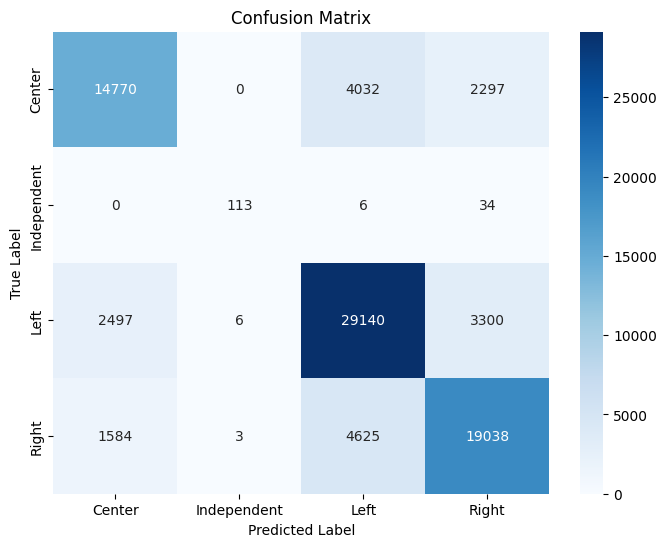

In [59]:
# Confusion Matrix for Linear SVC Model

# Split original training data into new training and validation sets
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and fit  pipeline with the new training data
pipe_svc.fit(X_train_new, y_train_new)
y_pred_train = pipe_svc.predict(X_val)

# Calculate accuracy on validation set
accuracy = accuracy_score(y_val, y_pred_train)
print("Accuracy for Validation Set:", accuracy)

# Plot confusion matrix for validation set
matrix = confusion_matrix(y_val, y_pred_train)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=['Center', 'Independent', 'Left', 'Right'],  yticklabels=['Center', 'Independent', 'Left', 'Right'], cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()